<a href="https://colab.research.google.com/github/HasibulRahman/EDGE_Project/blob/main/Human_Face_Landmark_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data and Preprocessing

In [ ]:
cd /content/drive/MyDrive/ML Projects/Facial Landmark Detection

/content/drive/MyDrive/ML Projects/Facial Landmark Detection


In [ ]:
pwd

'/content/drive/MyDrive/ML Projects/Facial Landmark Detection'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
# Ploting images with landmarks
def plot_image_landmarks(img_array, df_landmarks, index):
    plt.imshow(img_array[index, :, :, 0], cmap = 'gray')
    plt.scatter(df_landmarks.iloc[index][0: -1: 2], df_landmarks.iloc[index][1: : 2], c = 'y')
    plt.show()

In [ ]:
features = np.load('/content/drive/MyDrive/ML Projects/Facial Landmark Detection/face_images.npz/face_images.npz')
features = features.get(features.files[0]) # images
features = np.moveaxis(features, -1, 0)
features = features.reshape(features.shape[0], features.shape[1], features.shape[1], 1)

<frozen _collections_abc>:774: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.


In [ ]:
keypoints = pd.read_csv('/content/drive/MyDrive/ML Projects/Facial Landmark Detection/facial_keypoints.csv/facial_keypoints.csv')
keypoints.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [ ]:
# Cleaing data
keypoints = keypoints.fillna(0)
num_missing_keypoints = keypoints.isnull().sum(axis = 1)
num_missing_keypoints

,0
0,0
1,0
2,0
3,0
4,0
...,...
7044,0
7045,0
7046,0
7047,0


In [ ]:
new_features = features[keypoints.index.values, :, :, :] #Nums of rows,w, H, Channels
new_features = new_features / 255
keypoints.reset_index(inplace = True, drop = True)

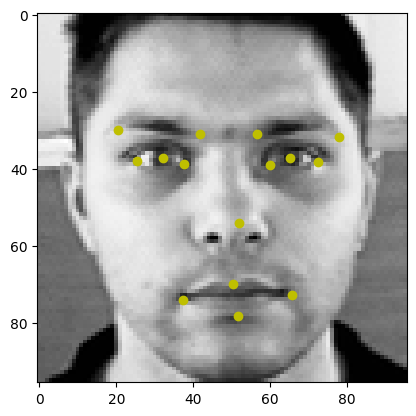

In [ ]:
plot_image_landmarks(new_features, keypoints, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_features, keypoints, test_size=0.2)

# Our Model

In [ ]:
from tqdm.keras import TqdmCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
img_size = 96

In [ ]:
model = Sequential()

model.add(Input(shape=(img_size, img_size, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding="same",kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding="same",kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding="same",kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0.1))

model.add(Dropout(0.5))

model.add(Dense(64,kernel_initializer=glorot_uniform()))
model.add(LeakyReLU(alpha=0))

model.add(Dense(30,kernel_initializer=glorot_uniform()))

model.summary()
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 96, 96, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 96, 96, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 96, 96, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,4

 Total params: 4,830,306 (18.43 MB)

 Trainable params: 4,830,112 (18.43 MB)

 Non-trainable params: 194 (776.00 B)

In [ ]:
BATCH_SIZE = 100
EPOCHS = 150

# Training Model

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose=1,
)

Epoch 1/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 193ms/step - accuracy: 0.4145 - loss: 638.2058 - val_accuracy: 0.0050 - val_loss: 911.2001
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7437 - loss: 283.6966 - val_accuracy: 0.8929 - val_loss: 711.2870
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8284 - loss: 227.5278 - val_accuracy: 0.8922 - val_loss: 761.3437
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8349 - loss: 191.2454 - val_accuracy: 0.4674 - val_loss: 877.5609
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8335 - loss: 184.1313 - val_accuracy: 0.8922 - val_loss: 775.7109
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8417 - loss: 173.4494 - val_accuracy: 0.8929 - val_loss: 707.9608
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8474 - loss: 159.8849 - val_accuracy: 0.8929 - val_loss: 669.8427
Epoch 8/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8559 - l

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

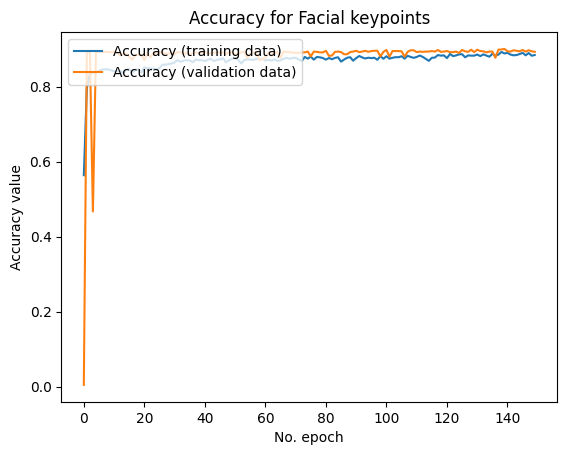

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy for Facial keypoints')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

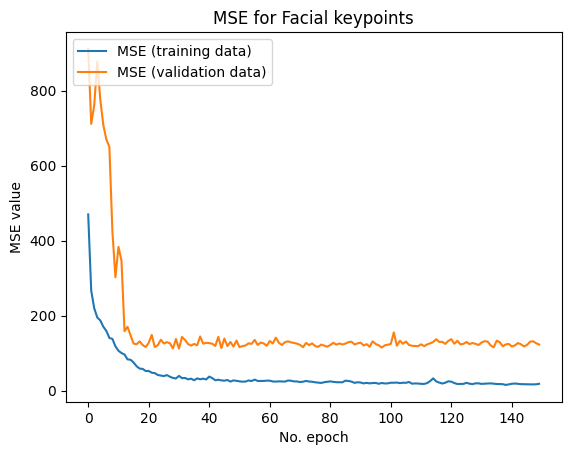

In [ ]:
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Model Evaluation

In [ ]:
y_pred = model.predict(x_test)
y_pred

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


array([[60.414856  , 36.208088  , 26.092121  , ..., 46.24793   ,
        41.611298  , 77.87507   ],
       [61.275635  , 32.776638  , 27.074184  , ..., -0.98226273,
        46.55235   , 70.897575  ],
       [63.374252  , 36.239414  , 29.796852  , ..., 68.527794  ,
        47.391792  , 78.118515  ],
       ...,
       [62.756504  , 34.31669   , 29.342037  , ..., -1.5031596 ,
        48.509342  , 71.02075   ],
       [61.496414  , 34.09851   , 25.742039  , ..., 66.772255  ,
        43.44745   , 78.40512   ],
       [67.52534   , 38.445625  , 32.237946  , ..., -1.6866304 ,
        51.852463  , 78.01073   ]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


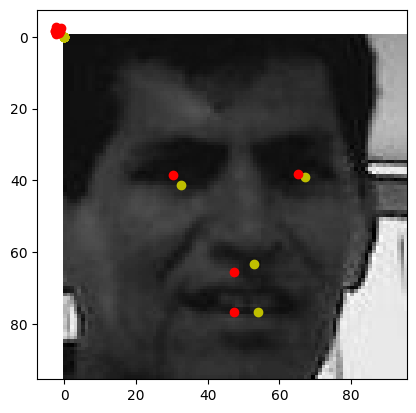

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def plot_img_preds(images, truth, pred, index):
    plt.imshow(images[index, :, :, 0], cmap='gray')

    t = np.array(truth)  # Corrected: Remove indexing here
    plt.scatter(t[0::2], t[1::2], c='y')

    p = pred[index, :]
    plt.scatter(p[0::2], p[1::2], c='r')

    plt.show()

# Get a random image and predict landmarks
random_index = random.randint(0, len(x_test) - 1)
random_image = x_test[random_index]
ground_truth_landmarks = y_test.iloc[random_index]
random_image = random_image.reshape(1, 96, 96, 1)
predictions = model.predict(random_image)

# Display the predictions
plot_img_preds(random_image, ground_truth_landmarks, predictions, 0)

In [57]:
!echo "# EDGE_Project" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!echo "# EDGE_Project" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/HasibulRahman/EDGE_Project.git
!git push -u origin main
!git commit -m "first commit"
!git branch -M main
!echo "# EDGE_Project" >> README.md
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!echo "# EDGE_Project" >> README.md
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/HasibulRahman/EDGE_Project.git
!git push -u origin main
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/HasibulRahman/EDGE_Project.git
!git push -u origin main
!git push -u origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/ML Projects/Facial Landmark Detection/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@8949b18e893c.(none)')
Reinitialized existing Git repository in /content/drive/MyDrive/ML Projects/F